In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [541]:
db = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Roksana@2000",
    database="XYZ_Company"
)
curs = db.cursor()



List all unique cities where customers are located.


In [542]:
curs.close()
curs = db.cursor()
# Ensure all rows are fetched
query = "SELECT DISTINCT customer_city FROM customers"
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()
data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [543]:
df =pd.DataFrame(data , columns=["City"])
df.head()

,City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


2. Count the number of orders placed in 2017.


In [544]:
curs.close()
curs = db.cursor()

# Ensure all rows are fetched
query = "SELECT count(order_id) FROM orders WHERE year(order_purchase_timestamp)=2017"
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

print("total orders placed in are , ")

print(data[0][0])


total orders placed in are , 
90202


3. Find the total sales per category.


In [545]:
curs.close()
curs = db.cursor()
query = """SELECT upper(products.product_category), SUM(payments.payment_value)
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN orders ON order_items.order_id = orders.order_id
JOIN payments ON orders.order_id = payments.order_id
GROUP BY products.product_category;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

print("total sales per category, ")

print(data)
curs.close()
data


total sales per category, 
[('PERFUMERY', 4053909.279152751), ('TELEPHONY', 3895056.4057009965), ('BED TABLE BATH', 13700429.368026152), ('FURNITURE DECORATION', 11441411.134212926), ('HOUSEWARES', 8758065.042271093), ('BABIES', 4318765.277880192), ('TOYS', 4952301.515835121), ('COMPUTER ACCESSORIES', 12682643.570066318), ('COOL STUFF', 6237584.000389457), ('HEALTH BEAUTY', 13258984.955148444), ('PET SHOP', 2490151.762411356), ('GENERAL INTEREST BOOKS', 517558.07692337036), ('STATIONARY STORE', 2539520.55727005), ('WATCHES PRESENT', 11433733.428739667), ('PCS', 2232972.3949279785), ('CLIMATIZATION', 729365.275894165), ('CONSTRUCTION TOOLS CONSTRUCTION', 1931805.0420703888), ('SPORT LEISURE', 11137020.473196179), ('BAGS ACCESSORIES', 1497210.3230803013), ('ELECTRONICS', 2078856.7973930687), ('AUTOMOTIVE', 6818354.649002075), ('CASA CONSTRUCAO', 1093162.3224523067), ('GAMES CONSOLES', 1563843.0330028534), ('HOME APPLIANCES', 764258.158618927), ('GARDEN TOOLS', 6706246.006225705), ('AGRO 

[('PERFUMERY', 4053909.279152751),
 ('TELEPHONY', 3895056.4057009965),
 ('BED TABLE BATH', 13700429.368026152),
 ('FURNITURE DECORATION', 11441411.134212926),
 ('HOUSEWARES', 8758065.042271093),
 ('BABIES', 4318765.277880192),
 ('TOYS', 4952301.515835121),
 ('COMPUTER ACCESSORIES', 12682643.570066318),
 ('COOL STUFF', 6237584.000389457),
 ('HEALTH BEAUTY', 13258984.955148444),
 ('PET SHOP', 2490151.762411356),
 ('GENERAL INTEREST BOOKS', 517558.07692337036),
 ('STATIONARY STORE', 2539520.55727005),
 ('WATCHES PRESENT', 11433733.428739667),
 ('PCS', 2232972.3949279785),
 ('CLIMATIZATION', 729365.275894165),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1931805.0420703888),
 ('SPORT LEISURE', 11137020.473196179),
 ('BAGS ACCESSORIES', 1497210.3230803013),
 ('ELECTRONICS', 2078856.7973930687),
 ('AUTOMOTIVE', 6818354.649002075),
 ('CASA CONSTRUCAO', 1093162.3224523067),
 ('GAMES CONSOLES', 1563843.0330028534),
 ('HOME APPLIANCES', 764258.158618927),
 ('GARDEN TOOLS', 6706246.006225705),
 ('AGRO IN

In [546]:
df = pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,PERFUMERY,4053909.28
1,TELEPHONY,3895056.41
2,BED TABLE BATH,13700429.37
3,FURNITURE DECORATION,11441411.13
4,HOUSEWARES,8758065.04
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


In [547]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
df['sales'] = df['sales'].astype(float)  # Optional as it's already numeric
df

,category,sales
0,PERFUMERY,4053909.28
1,TELEPHONY,3895056.41
2,BED TABLE BATH,13700429.37
3,FURNITURE DECORATION,11441411.13
4,HOUSEWARES,8758065.04
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


null value check each column

In [548]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
category    1
sales       0
dtype: int64


In [549]:
# Display rows with null values

print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])


Rows with null values:
   category      sales
26     None 2022413.68


In [550]:
# Fill null values in 'category' with 'Unknown'
df['category'] = df['category'].fillna('Unknown')

# Fill null values in 'sales' with 0
df['sales'] = df['sales'].fillna(0)

print("\nData after filling null values:")
print(df)


Data after filling null values:
                       category       sales
0                     PERFUMERY  4053909.28
1                     TELEPHONY  3895056.41
2                BED TABLE BATH 13700429.37
3          FURNITURE DECORATION 11441411.13
4                    HOUSEWARES  8758065.04
..                          ...         ...
69               CDS MUSIC DVDS     9595.44
70                   LA CUISINE    23308.24
71  FASHION CHILDREN'S CLOTHING     6285.36
72                     PC GAMER    17395.44
73       INSURANCE AND SERVICES     2596.08

[74 rows x 2 columns]


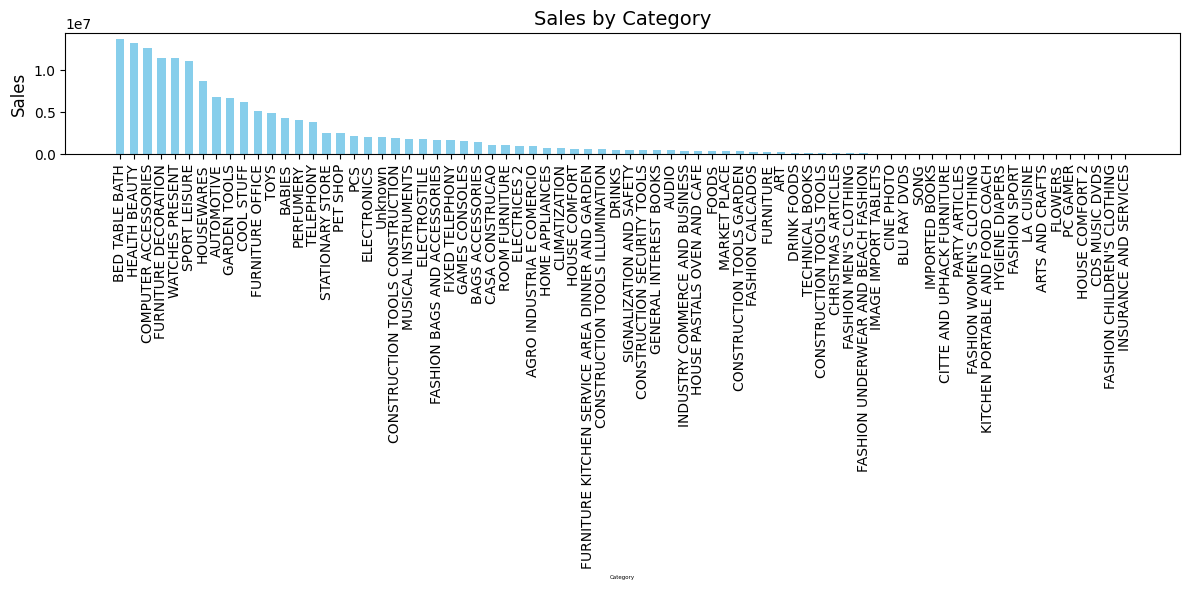

In [551]:
df =df.sort_values(by = "sales",ascending=False)

# Plot the bar chart with increased bar width
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(df['category'], df['sales'], color='skyblue', width=bar_width)

# Add labels and title
plt.xlabel('Category', fontsize=4)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales by Category', fontsize=14)

# Rotate category names for better visibility
plt.xticks(rotation=90, fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()

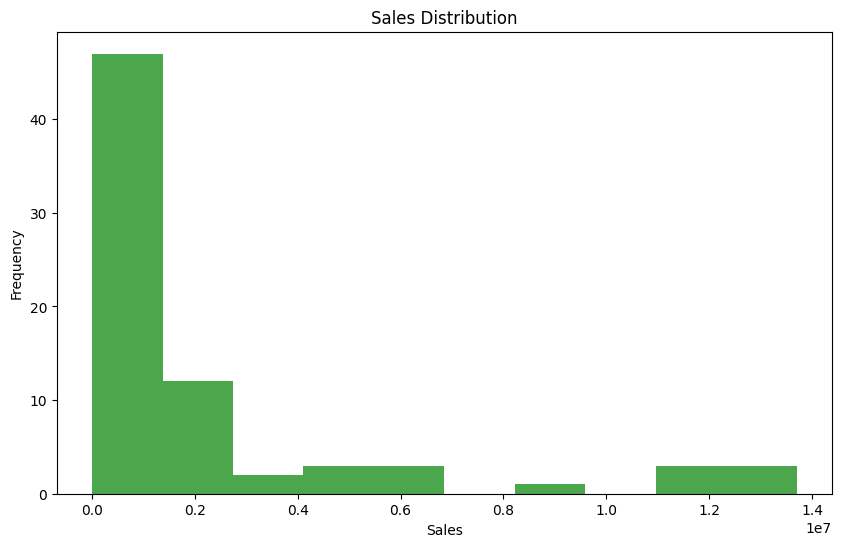

In [552]:
plt.figure(figsize=(10, 6))
plt.hist(df['sales'], bins=10, color='green', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

4. Calculate the percentage of orders that were paid in installments.


In [553]:
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
SELECT (SUM(case when payment_installments>=1 then 1
else 0 end ))/count(*)*100 from payments;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


curs.close()
"the percentage of orders that were paid in installments.",data


('the percentage of orders that were paid in installments.',
 [(Decimal('99.9981'),)])

5. Count the number of customers from each state. 


In [554]:
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
SELECT  customer_state, count(customer_id) from customers
group by customer_state;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


curs.close()
data


[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

In [555]:
df=pd.DataFrame(data,columns=["Ccustomer_state","count_customer"])
df

,Ccustomer_state,count_customer
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


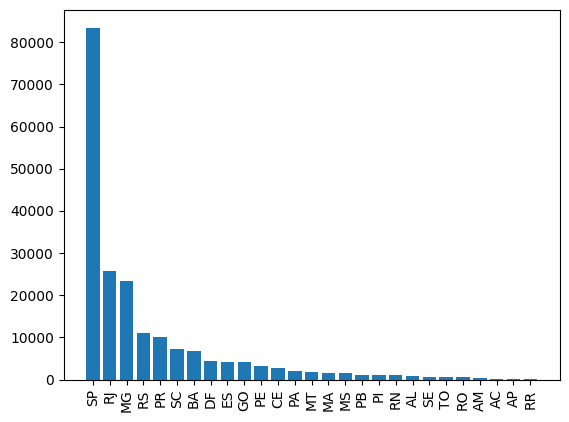

In [556]:
df =df.sort_values(by = "count_customer",ascending=False)

plt.bar(df["Ccustomer_state"], df["count_customer"])
plt.xticks(rotation=90)
plt.show()

# Intermidiate Queries 

- Calculate the number of orders per month in 2018.
- Find the average number of products per order, grouped by customer city.
- Calculate the percentage of total revenue contributed by each product category.
- Identify the correlation between product price and the number of times a product has been purchased.
- Calculate the total revenue generated by each seller, and rank them by revenue.


In [557]:
# Calculate the number of orders per month in 2018.
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
SELECT
    MONTH(order_purchase_timestamp) AS month,
    COUNT(*) AS order_id
FROM
    orders
WHERE
    YEAR(order_purchase_timestamp) = 2018
GROUP BY
    MONTH(order_purchase_timestamp)
ORDER BY
    month;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


curs.close()
data


[(1, 14538),
 (2, 13456),
 (3, 14422),
 (4, 13878),
 (5, 13746),
 (6, 12334),
 (7, 12584),
 (8, 13024),
 (9, 32),
 (10, 8)]

In [558]:
df=pd.DataFrame(data,columns=["month","total_Order"])
df

,month,total_Order
0,1,14538
1,2,13456
2,3,14422
3,4,13878
4,5,13746
5,6,12334
6,7,12584
7,8,13024
8,9,32
9,10,8


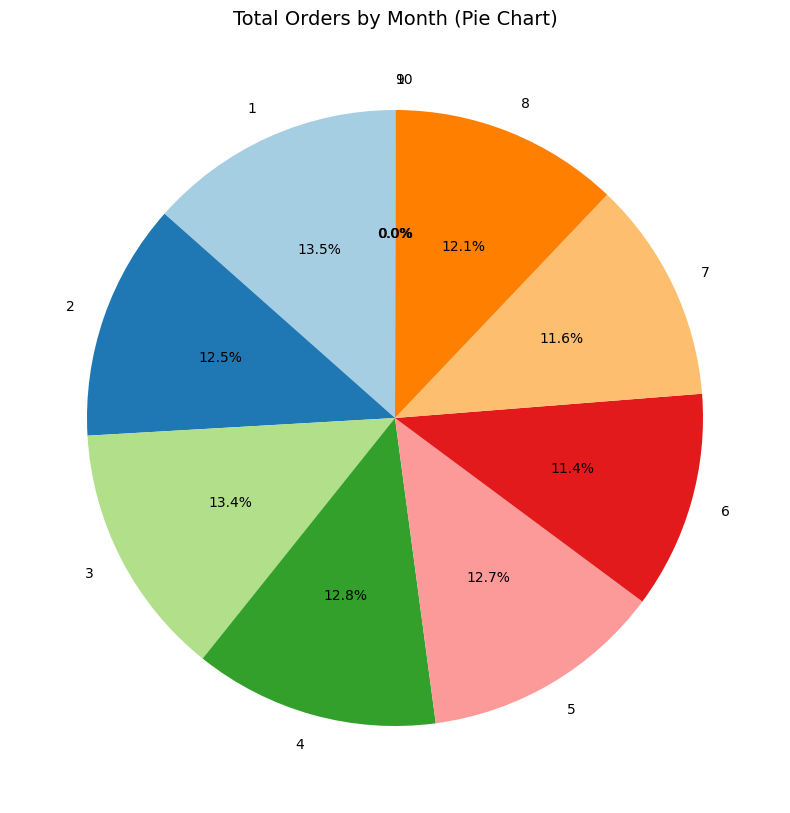

In [559]:
# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    df["total_Order"], 
    labels=df["month"], 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title("Total Orders by Month (Pie Chart)", fontsize=14)
plt.show()


In [560]:
# Calculate the number of orders per month in 2018.
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
SELECT 
month(order_purchase_timestamp) months,
count(order_id) order_count
FROM orders
WHERE year(order_purchase_timestamp) = 2018
GROUP BY
month(order_purchase_timestamp)
ORDER BY
months;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


data


[(1, 14538),
 (2, 13456),
 (3, 14422),
 (4, 13878),
 (5, 13746),
 (6, 12334),
 (7, 12584),
 (8, 13024),
 (9, 32),
 (10, 8)]

In [561]:
# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=["month_number", "order_count"])

# Map month numbers to names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
df["month_name"] = df["month_number"].map(month_mapping)

# Display the DataFrame with month names
print(df)

   month_number  order_count month_name
0             1        14538    January
1             2        13456   February
2             3        14422      March
3             4        13878      April
4             5        13746        May
5             6        12334       June
6             7        12584       July
7             8        13024     August
8             9           32  September
9            10            8    October


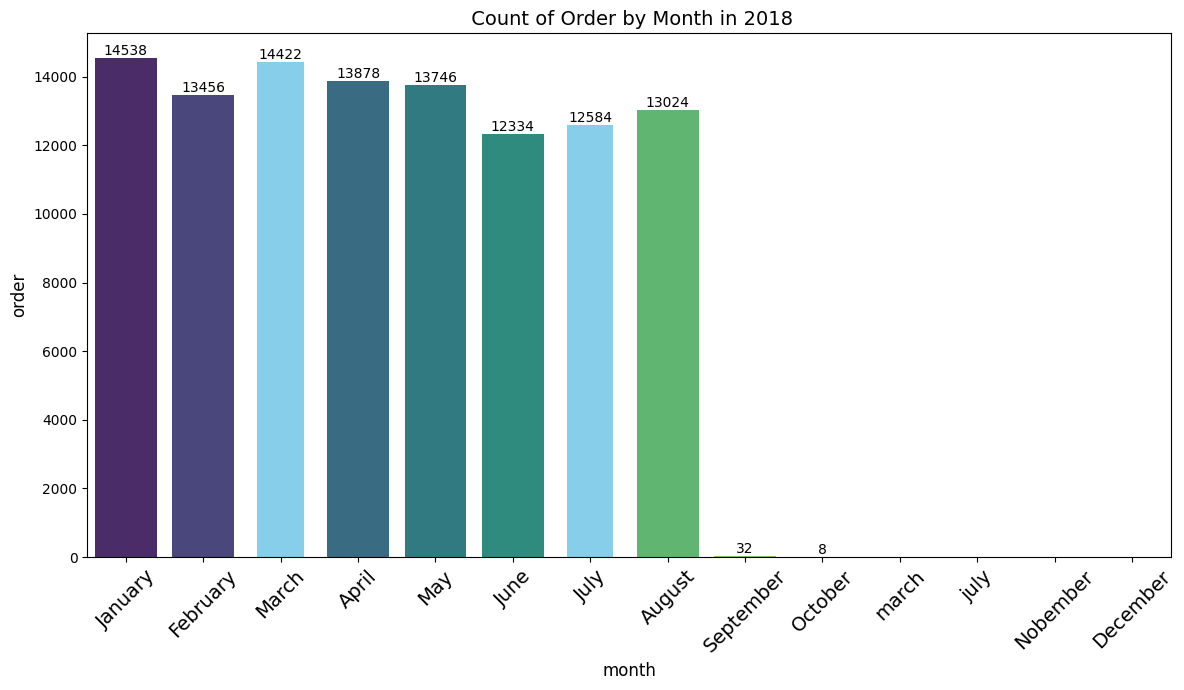

In [562]:
plt.figure(figsize=(12, 7))  # Adjust figure size for better readability
plt.bar(df['month_name'], df['order_count'], color='skyblue', width=bar_width)
o=["January","February","march","April","May","June","july","August","September","October","Nobember","December"]
# Add labels and title
plt.xlabel('month', fontsize=12)
plt.ylabel('order', fontsize=12)
plt.title(' Count of Order by Month in 2018', fontsize=14)
ax =sns.barplot(x=df['month_name'], y=df['order_count'], data =df, order=o,hue=df['month_name'],palette="viridis")
# Rotate category names for better visibility
plt.xticks(rotation=45, fontsize=14)
ax.bar_label(ax.containers[0])
# Show the chart
plt.tight_layout()
plt.show()

2. Find the average number of products per order, grouped by customer city.


In [563]:
# Calculate the number of orders per month in 2018.
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as OC
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city , round(avg(count_per_order.OC),2) average_orders
from customers join count_per_order
on customers.customer_id =count_per_order.customer_id
group by customers.customer_city
order by average_orders
;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


data


[('cairu', Decimal('2.00')),
 ('epitaciolandia', Decimal('2.00')),
 ('urucania', Decimal('2.00')),
 ('brotas de macaubas', Decimal('2.00')),
 ('tunapolis', Decimal('2.00')),
 ('porto calvo', Decimal('2.00')),
 ('ipupiara', Decimal('2.00')),
 ('capela do alto alegre', Decimal('2.00')),
 ('americo de campos', Decimal('2.00')),
 ('sao joao do sobrado', Decimal('2.00')),
 ('bora', Decimal('2.00')),
 ('humberto de campos', Decimal('2.00')),
 ('major porto', Decimal('2.00')),
 ('passagem', Decimal('2.00')),
 ('jacigua', Decimal('2.00')),
 ('barrocas', Decimal('2.00')),
 ('padre gonzales', Decimal('2.00')),
 ('matrincha', Decimal('2.00')),
 ('campina das missoes', Decimal('2.00')),
 ('coronel sapucaia', Decimal('2.00')),
 ('jardim de piranhas', Decimal('2.00')),
 ('minduri', Decimal('2.00')),
 ('amanari', Decimal('2.00')),
 ('santo antonio do leverger', Decimal('2.00')),
 ('ponte alta do norte', Decimal('2.00')),
 ('boa esperanca do iguacu', Decimal('2.00')),
 ('tecainda', Decimal('2.00')),
 

In [564]:
df = pd.DataFrame(data,columns=["Customer_City","Average_Orders/Product"])
df.head()

,Customer_City,Average_Orders/Product
0,cairu,2.00
1,epitaciolandia,2.00
2,urucania,2.00
3,brotas de macaubas,2.00
4,tunapolis,2.00


3. Calculate the percentage of total revenue contributed by each product category.


In [565]:
# Calculate the number of orders per month in 2018.
# Ensure the cursor is reset
curs.close()
curs = db.cursor()

query = """
SELECT upper(products.product_category) category, round(SUM(payments.payment_value)/(select SUM(payment_value)from payments)*100,2) sales_percentage
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN orders ON order_items.order_id = orders.order_id
JOIN payments ON orders.order_id = payments.order_id
GROUP BY products.product_category
order by sales_percentage desc;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


data


[('BED TABLE BATH', 42.79),
 ('HEALTH BEAUTY', 41.41),
 ('COMPUTER ACCESSORIES', 39.61),
 ('FURNITURE DECORATION', 35.73),
 ('WATCHES PRESENT', 35.71),
 ('SPORT LEISURE', 34.78),
 ('HOUSEWARES', 27.35),
 ('AUTOMOTIVE', 21.3),
 ('GARDEN TOOLS', 20.95),
 ('COOL STUFF', 19.48),
 ('FURNITURE OFFICE', 16.16),
 ('TOYS', 15.47),
 ('BABIES', 13.49),
 ('PERFUMERY', 12.66),
 ('TELEPHONY', 12.17),
 ('STATIONARY STORE', 7.93),
 ('PET SHOP', 7.78),
 ('PCS', 6.97),
 ('ELECTRONICS', 6.49),
 (None, 6.32),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 6.03),
 ('MUSICAL INSTRUMENTS', 5.82),
 ('ELECTROSTILE', 5.64),
 ('FASHION BAGS AND ACCESSORIES', 5.45),
 ('FIXED TELEPHONY', 5.17),
 ('GAMES CONSOLES', 4.88),
 ('BAGS ACCESSORIES', 4.68),
 ('CASA CONSTRUCAO', 3.41),
 ('ROOM FURNITURE', 3.4),
 ('ELECTRICES 2', 3.11),
 ('AGRO INDUSTRIA E COMERCIO', 2.97),
 ('HOME APPLIANCES', 2.39),
 ('CLIMATIZATION', 2.28),
 ('HOUSE COMFORT', 2.11),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 1.87),
 ('CONSTRUCTION TOOLS

In [566]:
df = pd.DataFrame(data,columns=["Category","sales_percentage"])
df

,Category,sales_percentage
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71
...,...,...
69,PC GAMER,0.05
70,HOUSE COMFORT 2,0.04
71,CDS MUSIC DVDS,0.03
72,FASHION CHILDREN'S CLOTHING,0.02


4. Identify the correlation between product price and the number of times a product has been purchased.


In [567]:
curs.close()
curs = db.cursor()
query="""select products.product_category,count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id =order_items.product_id
group by products.product_category
;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()


data

[('HEALTH BEAUTY', 19340, 130.16),
 ('sport leisure', 17282, 114.34),
 ('Cool Stuff', 7592, 167.36),
 ('computer accessories', 15654, 116.51),
 ('Watches present', 11982, 201.14),
 ('housewares', 13928, 90.79),
 ('electronics', 5534, 57.91),
 (None, 3206, 112.0),
 ('toys', 8234, 117.55),
 ('bed table bath', 22230, 93.3),
 ('Games consoles', 2274, 138.49),
 ('automotive', 8470, 139.96),
 ('Furniture Decoration', 16668, 87.56),
 ('home appliances', 1542, 103.98),
 ('telephony', 9090, 71.21),
 ('Construction Tools Construction', 1858, 155.73),
 ('perfumery', 6838, 116.74),
 ('stationary store', 5034, 91.75),
 ('Room Furniture', 1006, 137.01),
 ('Fashion Bags and Accessories', 4062, 75.25),
 ('Garden tools', 8694, 111.63),
 ('Fashion Underwear and Beach Fashion', 262, 72.84),
 ('pet Shop', 3894, 110.07),
 ('SIGNALIZATION AND SAFETY', 398, 108.09),
 ('ELECTRICES 2', 476, 476.12),
 ("Fashion Women's Clothing", 96, 58.41),
 ('Bags Accessories', 2184, 128.6),
 ('General Interest Books', 1106, 

In [568]:
df=pd.DataFrame(data, columns= ["Product_Category","Total_order","Avg_Price"])
df.head()

,Product_Category,Total_order,Avg_Price
0,HEALTH BEAUTY,19340,130.16
1,sport leisure,17282,114.34
2,Cool Stuff,7592,167.36
3,computer accessories,15654,116.51
4,Watches present,11982,201.14


In [569]:
arr1 = df["Total_order"]
arr2 =df["Avg_Price"]
A = np.corrcoef([arr1,arr2])
print("the Correlation Between prict andnumber of times  product has been purchase ", A[0][1])

the Correlation Between prict andnumber of times  product has been purchase  -0.10631514167157562


The output of np.corrcoef([arr1, arr2]) is the **correlation matrix**, which shows the linear relationship between the variables arr1 (Total_order) and arr2 (Avg_Price).

There is a very weak negative linear relationship between Total_order and Avg_Price.
This suggests that changes in the total number of orders (Total_order) are not strongly linked to changes in the average price (Avg_Price).

5. Calculate the total revenue generated by each seller, and rank them by revenue.


In [570]:
curs.close()
curs = db.cursor()
query = """

select *, rank()over(order by revenue desc) as rn from
(select order_items.seller_id,round(sum(payments.payment_value))
revenue
from order_items join payments
on order_items.order_id =payments.order_id
group by order_items.seller_id) as A
;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

print("total sales per category, ")

print(data)
curs.close()
data


total sales per category, 
[('7c67e1448b00f6e969d365cea6b010ab', 1014334.0, 1), ('1025f0e2d44d7041d6cf58b6550e0bfa', 616444.0, 2), ('4a3ca9315b744ce9f8e9374361493884', 602491.0, 3), ('1f50f920176fa81dab994f9023523100', 580507.0, 4), ('53243585a1d6dc2643021fd1853d8905', 569806.0, 5), ('da8622b14eb17ae2831f4ac5b9dab84a', 544439.0, 6), ('4869f7a5dfa277a7dca6462dcf3b52b2', 528332.0, 7), ('955fee9216a65b617aa5c0531780ce60', 472645.0, 8), ('fa1c13f2614d7b5c4749cbc52fecda94', 413026.0, 9), ('7e93a43ef30c4f03f38b393420bc753a', 370268.0, 10), ('6560211a19b47992c3666cc44a7e94c0', 359315.0, 11), ('7a67c85e85bb2ce8582c35f2203ad736', 338062.0, 12), ('25c5c91f63607446a97b143d2d535d31', 321069.0, 13), ('a1043bafd471dff536d0c462352beb48', 308714.0, 14), ('46dc3b2cc0980fb8ec44634e21d2718e', 297729.0, 15), ('b37c4c02bda3161a7546a4e6d222d5b2', 290638.0, 16), ('620c87c171fb2a6dd6e8bb4dec959fc6', 290536.0, 17), ('cc419e0650a3c5ba77189a1882b7556a', 282619.0, 18), ('5dceca129747e92ff8ef7a997dc4f8ca', 265949.

[('7c67e1448b00f6e969d365cea6b010ab', 1014334.0, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 616444.0, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 602491.0, 3),
 ('1f50f920176fa81dab994f9023523100', 580507.0, 4),
 ('53243585a1d6dc2643021fd1853d8905', 569806.0, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 544439.0, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 528332.0, 7),
 ('955fee9216a65b617aa5c0531780ce60', 472645.0, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 413026.0, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 370268.0, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 359315.0, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 338062.0, 12),
 ('25c5c91f63607446a97b143d2d535d31', 321069.0, 13),
 ('a1043bafd471dff536d0c462352beb48', 308714.0, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 297729.0, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 290638.0, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 290536.0, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 282619.0, 18),
 ('5dceca129747e92ff8ef7a997dc4f8ca', 265949.0, 19),
 

In [571]:
df=pd.DataFrame(data, columns= ["Saller ID","Revenue","Rank"])
df.head()

,Saller ID,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,1014334.00,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,616444.00,2
2,4a3ca9315b744ce9f8e9374361493884,602491.00,3
3,1f50f920176fa81dab994f9023523100,580507.00,4
4,53243585a1d6dc2643021fd1853d8905,569806.00,5


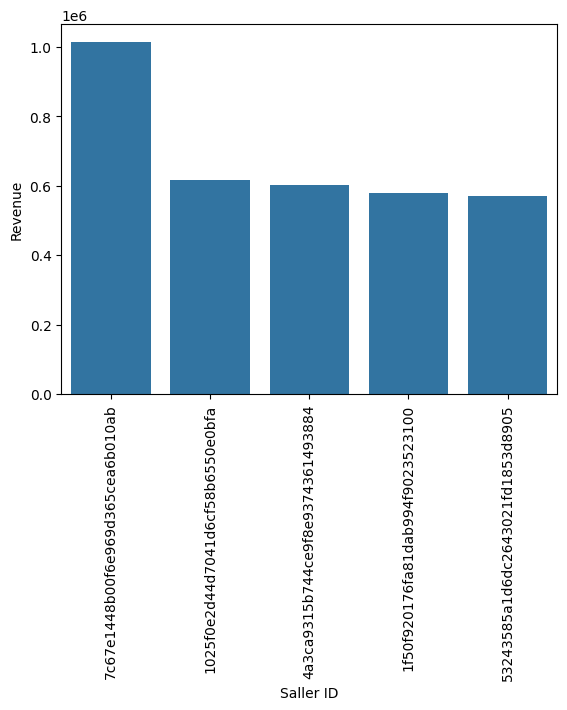

In [572]:
df=df.head()
sns.barplot(x = df["Saller ID"],y=df["Revenue"],data=df )
plt.xticks(rotation=90)
plt.show()

# Advanced Queries
=====================

1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

**1.Calculate the moving average of order values for each customer over their order history.**


In [573]:
curs.close()
curs = db.cursor()
query = """

select customer_id,order_purchase_timestamp,payment,
avg(payment)over(partition by  customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

curs.close()
data


[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-2

In [574]:
df=pd.DataFrame(data, columns= ["customer ID","order_Date","Payment","Mov_Avg"])
df

,customer ID,order_Date,Payment,Mov_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.37


**2. Calculate the cumulative sales per month for each year.**


In [575]:
curs.close()
curs = db.cursor()
query = """

select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id 
group by years, months 
order by years, months;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

print("total sales per category, ")

print("avg sales per category, ")
curs.close()
data


total sales per category, 
avg sales per category, 


[(2016, 9, 1008.96),
 (2016, 10, 236361.92),
 (2016, 12, 78.48),
 (2017, 1, 553952.16),
 (2017, 2, 1167632.04),
 (2017, 3, 1799454.4),
 (2017, 4, 1671152.12),
 (2017, 5, 2371675.28),
 (2017, 6, 2045105.52),
 (2017, 7, 2369531.68),
 (2017, 8, 2697585.28),
 (2017, 9, 2911049.8),
 (2017, 10, 3118711.52),
 (2017, 11, 4779531.2),
 (2017, 12, 3513605.92),
 (2018, 1, 4460016.72),
 (2018, 2, 3969853.36),
 (2018, 3, 4638608.48),
 (2018, 4, 4643141.92),
 (2018, 5, 4615928.6),
 (2018, 6, 4095522.0),
 (2018, 7, 4266163.0),
 (2018, 8, 4089701.29),
 (2018, 9, 17758.16),
 (2018, 10, 2358.68)]

In [576]:
df=pd.DataFrame(data, columns= ["Years","Month","Payment"])
# Map month numbers to names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
df["month_name"] = df["Month"].map(month_mapping)


df

,Years,Month,Payment,month_name
0,2016,9,1008.96,September
1,2016,10,236361.92,October
2,2016,12,78.48,December
3,2017,1,553952.16,January
4,2017,2,1167632.04,February
5,2017,3,1799454.40,March
6,2017,4,1671152.12,April
7,2017,5,2371675.28,May
8,2017,6,2045105.52,June
9,2017,7,2369531.68,July


cumulative payment are


In [577]:
curs.close()
curs = db.cursor()

query="""

select years,months,sum(payment)
over(order by years, months)from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id 
group by years, months 
order by years, months)as a;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

data

[(2016, 9, 1008.96),
 (2016, 10, 237370.88),
 (2016, 12, 237449.36000000002),
 (2017, 1, 791401.52),
 (2017, 2, 1959033.56),
 (2017, 3, 3758487.96),
 (2017, 4, 5429640.08),
 (2017, 5, 7801315.359999999),
 (2017, 6, 9846420.879999999),
 (2017, 7, 12215952.559999999),
 (2017, 8, 14913537.839999998),
 (2017, 9, 17824587.639999997),
 (2017, 10, 20943299.159999996),
 (2017, 11, 25722830.359999996),
 (2017, 12, 29236436.279999994),
 (2018, 1, 33696452.99999999),
 (2018, 2, 37666306.35999999),
 (2018, 3, 42304914.83999999),
 (2018, 4, 46948056.75999999),
 (2018, 5, 51563985.35999999),
 (2018, 6, 55659507.35999999),
 (2018, 7, 59925670.35999999),
 (2018, 8, 64015371.64999999),
 (2018, 9, 64033129.80999999),
 (2018, 10, 64035488.48999999)]

In [578]:
df=pd.DataFrame(data, columns= ["Years","Month","Payment"])
# Map month numbers to names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
df["month_name"] = df["Month"].map(month_mapping)


df

,Years,Month,Payment,month_name
0,2016,9,1008.96,September
1,2016,10,237370.88,October
2,2016,12,237449.36,December
3,2017,1,791401.52,January
4,2017,2,1959033.56,February
5,2017,3,3758487.96,March
6,2017,4,5429640.08,April
7,2017,5,7801315.36,May
8,2017,6,9846420.88,June
9,2017,7,12215952.56,July


3. Calculate the year-over-year growth rate of total sales.


In [579]:
curs.close()
curs = db.cursor()

query="""
with a as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id 
group by years 
order by years)

select years, (payment-lag(payment,1)over 
(order by years))/lag(payment,1)over 
(order by years)*100  from a;
"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

data

[(2016, None), (2017, 12112.703757129522), (2018, 20.000923887447627)]

In [580]:
df =pd.DataFrame(data,columns=["years","yoy % Growth"])
df

,years,yoy % Growth
0,2016,NaN
1,2017,12112.70
2,2018,20.00


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [581]:
curs.close()
curs = db.cursor()

query="""

with a as
(select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),
b as 
(select a.customer_id , count(distinct  orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp> first_order
and orders.order_purchase_timestamp<date_add(first_order ,interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b 
on a.customer_id=b.customer_id;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

data

[(None,)]

5. Identify the top 3 customers who spent the most money in each year.

In [587]:
curs.close()
curs = db.cursor()

query="""

select years, customer_id,payment,d_rank
from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment ,
dense_rank() over ( partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc)d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id) as a
where d_rank<=3
;

"""
curs.execute(query)


# Fetch all rows to consume the result
data = curs.fetchall()

data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 5694.2001953125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 5602.9599609375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 4911.1201171875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 54656.3203125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 27717.240234375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 26906.640625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 29099.51953125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 27688.83984375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 19237.759765625, 3)]

In [589]:
df = pd.DataFrame(data, columns=["year","customer_Id","payment","rank"])
df.head(10)

,year,customer_Id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,5694.20,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,5602.96,2
2,2016,4a06381959b6670756de02e07b83815f,4911.12,3
3,2017,1617b1357756262bfa56ab541c47bc16,54656.32,1
4,2017,c6e2731c5b391845f6800c97401a43a9,27717.24,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,26906.64,3
6,2018,ec5b2ba62e574342386871631fafd3fc,29099.52,1
7,2018,f48d464a0baaea338cb25f816991ab1f,27688.84,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,19237.76,3


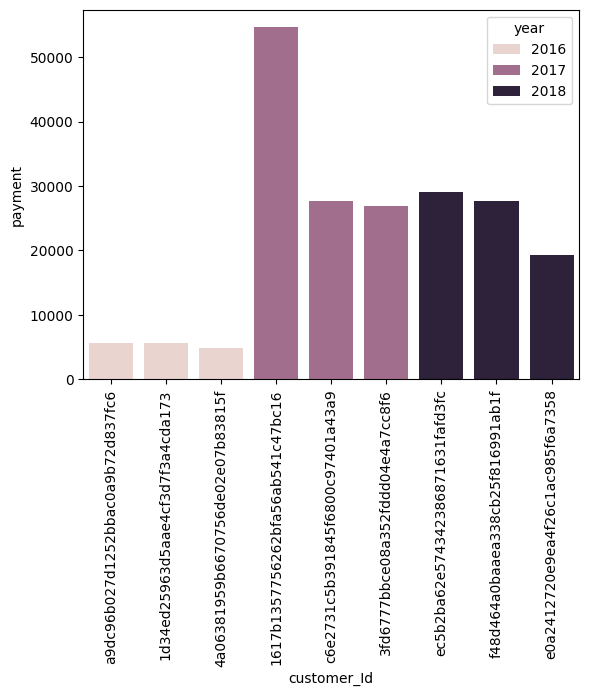

In [590]:
sns.barplot(x="customer_Id",y="payment", data=df,hue="year")
plt.xticks(rotation=90)
plt.show()